In [421]:
import pandas as pd

In [422]:
df = pd.read_csv('data\students.csv')
df.head()

,Age,Growth,Shoe size,Course number,Year of birth,Friend number,Russian rating,Maths rating,Physics rating,Computer science rating,...,Social network duration min,Chocolate,City population,Strange people,Your insitute,Brother-sister,Plane seat,MIddle and index finger,Middle and ring finger,Middle and little finger
0,20,170,40,2,2002,100,85,86,0,84,...,45,Сникерс,800000.0,Экономический,Математический и ИТ,нет ни брата ни сестры,У окна (пардон: у иллюминатора),20,10.0,40.0
1,22,191,43,7,2000,307,69,74,64,72,...,180,КитКат,800000.0,Математический и ИТ,Математический и ИТ,есть и брат и сестра,В середине,5,5.0,20.0
2,21,172,41,4,2000,186,78,62,0,0,...,90,КитКат,770000.0,Педагогический,Другое,есть брат,У окна (пардон: у иллюминатора),13,10.0,26.0
3,19,168,38,2,2003,604,72,0,0,0,...,200,Баунти,900000.0,СоцГум,Юридический,есть сестра,У окна (пардон: у иллюминатора),12,13.5,35.0
4,23,159,36,1,1998,144,0,0,0,0,...,400,Баунти,860000.0,Педагогический,Педагогический,есть сестра,У окна (пардон: у иллюминатора),10,11.0,22.0


In [423]:
df.iloc[12]['Growth']

169

In [424]:
df.iloc[len(df) - 18]['Growth']

161

In [425]:
len(df.loc[df['Rock paper scissors'] == 'Ножницы'])

88

In [426]:
max_val = df['Rock paper scissors'].max()
print(f'Чаще выбирают: {max_val}')
win_conditions = {'Камень': 'Бумага', 'Ножницы': 'Камень', 'Бумага': 'Ножницы'}
win_conditions.get(max_val)

Чаще выбирают: Ножницы


'Камень'

In [427]:
df.iloc[9][['Weight', 'Sex']]

Weight       58.0
Sex       женский
Name: 9, dtype: object

In [428]:
df.loc[df['Weight'] == df['Weight'].max()]['Growth']

7    180
Name: Growth, dtype: int64

In [429]:
df[df['Friend number'] == 0 ].value_counts(['Sex'])

Sex    
женский    1
мужской    1
Name: count, dtype: int64

In [430]:
round((len(df[(df['Animal'] == 'Собак') & (df['Floor number'] == 1)]) / len(df[df['Animal'] == 'Собак'])) * 100)

12

In [431]:
single_child = df.loc[df['Brother-sister'] == 'нет ни брата ни сестры']
not_single_child = df.loc[df['Brother-sister'] != 'нет ни брата ни сестры']
single_child['Social network duration min'].median() - not_single_child['Social network duration min'].median()

60.0

In [432]:
df_weight_fastfood = df[['Fastfood', 'Weight']].groupby('Fastfood').agg({'Weight': 'mean'})
df_weight_fastfood

,Weight
Fastfood,
KFC,66.859155
Бургер кинг,64.217391
Макдональдс (или как он там сейчас называется?),58.800000


In [433]:
df_weight_fastfood.loc['KFC'] - df_weight_fastfood.loc['Макдональдс (или как он там сейчас называется?)']

Weight    8.059155
dtype: float64

In [434]:
df_cut = df[['Year of birth', 'Growth', 'Weight', 'Hair length', 'Shoe size']]
df_cut.sort_values('Shoe size', ascending=False).reset_index(drop=True)['Year of birth'].iloc[2]

2002

In [435]:
df_cut.sort_values('Shoe size', ascending=False).iloc[2,0]

2002

In [436]:
df_cut.sort_values(['Shoe size', 'Growth'], ascending=[False, True]).iloc[1,0]

2003

In [437]:
df_cut['Full length'] = df_cut[['Growth', 'Hair length']].sum(axis=1)
df_cut['Full length'].max()

C:\Users\Pong\AppData\Local\Temp\ipykernel_9988\1536865746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut['Full length'] = df_cut[['Growth', 'Hair length']].sum(axis=1)


319.0

In [438]:
round(df_cut['Growth'].corr(df_cut['Shoe size']), 2)

0.86

In [439]:
display(df.groupby('Glasses')[['Russian rating', 'Maths rating']].mean())
df.groupby('Glasses')[['Russian rating', 'Maths rating']].mean().loc['простите. не увидел(а) вопроса ))))', 'Maths rating'].round(1)

,Russian rating,Maths rating
Glasses,,
да,83.388235,56.741176
нет,80.471910,59.955056
простите. не увидел(а) вопроса )))),77.900000,54.700000


54.7

In [440]:
display(df.groupby('Rock paper scissors')[['Russian rating', 'Maths rating']].mean())
df.groupby('Rock paper scissors')[['Russian rating', 'Maths rating']].mean().loc['Бумага', 'Maths rating'].round(2)

,Russian rating,Maths rating
Rock paper scissors,,
Бумага,76.473684,52.894737
Камень,81.450000,62.166667
Ножницы,83.988636,57.738636


52.89

In [441]:
df['Children number'].isna().sum()

36

In [442]:
females = df.loc[df['Sex'] == 'женский']
males = df.loc[df['Sex'] == 'мужской']
females['Weight'] = females['Weight'].fillna(females['Weight'].mean())
males['Weight'] = males['Weight'].fillna(males['Weight'].mean())
df_new = pd.concat([females, males])
df_new['Weight'].mean()

C:\Users\Pong\AppData\Local\Temp\ipykernel_9988\770029833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  females['Weight'] = females['Weight'].fillna(females['Weight'].mean())
C:\Users\Pong\AppData\Local\Temp\ipykernel_9988\770029833.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  males['Weight'] = males['Weight'].fillna(males['Weight'].mean())


63.53201161071252

In [443]:
df_new = df.copy()

df_new.loc[(df_new.Sex=='женский'), 'Weight'] = df_new.loc[(df_new.Sex=='женский'), 'Weight'].fillna(df_new.loc[(df_new.Sex=='женский'), 'Weight'].mean())
df_new.loc[(df_new.Sex=='мужской'), 'Weight'] = df_new.loc[(df_new.Sex=='мужской'), 'Weight'].fillna(df_new.loc[(df_new.Sex=='мужской'), 'Weight'].mean())

df_new['Weight'].mean()

63.53201161071252

In [444]:
singles = df.loc[df['Brother-sister'] == 'нет ни брата ни сестры' ]
sublings = df.loc[df['Brother-sister'] != 'нет ни брата ни сестры' ]
singles['Children number'] = singles['Children number'].fillna(singles['Children number'].median())
sublings['Children number'] = sublings['Children number'].fillna(sublings['Children number'].median())
df_new = pd.concat([singles, sublings])
df_new['Children number'].median()

C:\Users\Pong\AppData\Local\Temp\ipykernel_9988\1188050179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  singles['Children number'] = singles['Children number'].fillna(singles['Children number'].median())
C:\Users\Pong\AppData\Local\Temp\ipykernel_9988\1188050179.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sublings['Children number'] = sublings['Children number'].fillna(sublings['Children number'].median())


2.0

In [445]:
df.groupby(df['Brother-sister'] != 'нет ни брата ни сестры')['Children number'].apply(lambda x: x.fillna(x.median())).median()

2.0

In [446]:
iqr = df['Putin age'].quantile(0.75) - df['Putin age'].quantile(0.25)
low, hight = df['Putin age'].quantile(0.25) - 1.5 * iqr, df['Putin age'].quantile(0.75) + 1.5 * iqr
low, hight

(62.5, 74.5)

In [447]:
df_new = df.copy()

print(len(df_new.loc[(df_new['Putin age'] > low) & (df_new['Putin age'] < hight)]))
print(df_new.loc[(df_new['Putin age'] > low) & (df_new['Putin age'] < hight)]['Putin age'].median())

148
69.0


# 3.4  Кластеризация

In [448]:
import seaborn as sns
from sklearn.cluster import KMeans

In [449]:
# Кластеризация по росту и весу

In [450]:
df_new = df[['Weight', 'Growth', 'Sex']]
df_cut = df_new.dropna()
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(df_cut[['Weight', 'Growth']])
df_cut['Clusters'] = kmeans.labels_

c:\Users\Pong\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Pong\AppData\Local\Temp\ipykernel_9988\4055670114.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut['Clusters'] = kmeans.labels_


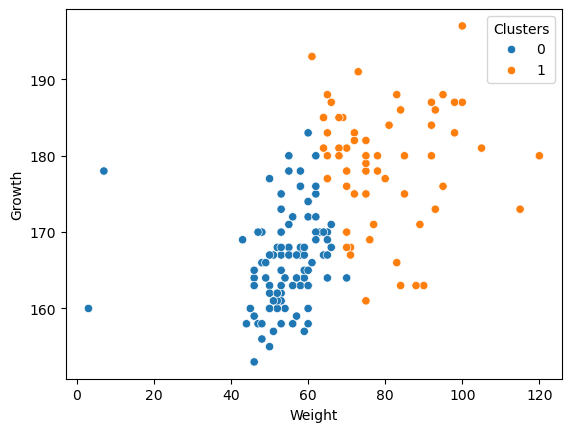

In [451]:
sns.scatterplot(df_cut, x='Weight', y='Growth', hue='Clusters');

In [452]:
df_cut.head()

,Weight,Growth,Sex,Clusters
0,64.0,170,женский,0
1,73.0,191,мужской,1
2,60.0,172,мужской,0
3,59.0,168,женский,0
4,57.0,159,женский,0


<Axes: xlabel='Weight', ylabel='Growth'>

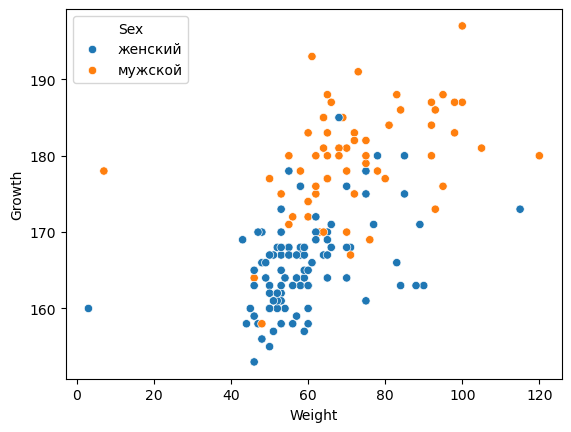

In [453]:
sns.scatterplot(df_cut, x='Weight', y='Growth', hue='Sex')

In [454]:
# Кластеризация по размеру обуви и весу    

In [455]:
df_new = df[['Shoe size', 'Weight', 'Sex']]
df_cut = df_new.dropna()
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(df_cut[['Weight', 'Shoe size']])
df_cut['Clusters'] = kmeans.labels_

c:\Users\Pong\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Pong\AppData\Local\Temp\ipykernel_9988\4140103915.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut['Clusters'] = kmeans.labels_


In [456]:
df_cut.head()

,Shoe size,Weight,Sex,Clusters
0,40,64.0,женский,0
1,43,73.0,мужской,1
2,41,60.0,мужской,0
3,38,59.0,женский,0
4,36,57.0,женский,0


In [460]:
len(df_cut.loc[(df_cut['Sex'] == 'мужской') & (df_cut['Clusters'] == 0)])

31

# 4.1 Задача предсказания и регрессия

In [463]:
from sklearn.linear_model import LinearRegression

In [464]:
df_cut = df[['Growth', 'Shoe size']]
df_cut = df_cut.dropna()

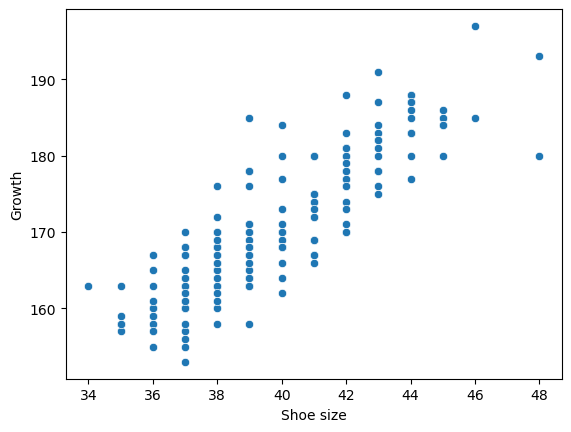

In [466]:
sns.scatterplot(df_cut, x='Shoe size', y='Growth');

In [468]:
logreg = LinearRegression()
results = logreg.fit(df_cut['Shoe size'].values.reshape(-1, 1), y=df_cut['Growth'])

In [471]:
# df_cut['Shoe size'].values.reshape(-1, 1)

In [479]:
# growth = a * shoe_size + b
# growth = 2.77717058 * shoe_size + 60.365811257367284

print(f'a = {results.coef_[0]}, b = {results.intercept_}')

a = 2.7771705842872185, b = 60.365811257367284


In [ ]:
# Предсказание роста
df_cut['Predicted growth'] = results.predict(df_cut['Shoe size'].values.reshape(-1, 1))

In [481]:
df_cut.head()

,Growth,Shoe size,Predicted growth
0,170,40,171.452635
1,191,43,179.784146
2,172,41,174.229805
3,168,38,165.898293
4,159,36,160.343952


In [484]:
# Ошибка предсказания (средняя абсолютная ошибка)
from sklearn.metrics import mean_absolute_error

In [485]:
mean_absolute_error(df_cut['Growth'], df_cut['Predicted growth'])

3.4506986819983885

In [459]:
df.columns

Index(['Age', 'Growth', 'Shoe size', 'Course number', 'Year of birth',
       'Friend number', 'Russian rating', 'Maths rating', 'Physics rating',
       'Computer science rating', 'Chemistry rating', 'Literature rating',
       'History rating', 'Geography rating', 'Biology rating',
       'Foreign language rating', 'Social science rating',
       'Distance to home km', 'Minutes to first class', 'Children number',
       'Removed teeth', 'Weight', 'Glasses', 'Sex',
       'Problems in last semester', 'Coin', 'Rock paper scissors', 'Animal',
       'Month of birthday', 'Your rating in university', 'Fastfood',
       'Height of 5000 mm', 'Width of 5000 mm', 'Putin age', 'Army', 'Hostel',
       'Hair length', 'Floor number', 'Social network duration min',
       'Chocolate', 'City population', 'Strange people', 'Your insitute',
       'Brother-sister', 'Plane seat', 'MIddle and index finger',
       'Middle and ring finger', 'Middle and little finger'],
      dtype='object')